# Handwritten Digits

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load the mnsit dataset

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shape of x_train,x_test, y_test and y_train

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

### Plot few digits

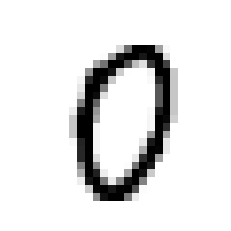

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[1000],cmap='binary')
plt.axis('off')
plt.show()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


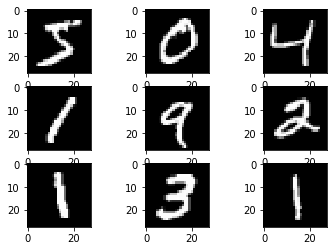

In [8]:
from matplotlib import pyplot
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# Logistic Regression

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
model.fit(x_train.reshape(60000,-1),y_train)      #x is in 3d so need to convert 2d

LogisticRegression()

In [13]:
y_predict = model.predict(x_test.reshape(10000,-1))

### Accuracy Score - Logistic Regression

In [14]:
accuracy_score(y_test,y_predict)

0.9255

In [15]:
import pandas as pd
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,963,0,0,3,1,3,4,4,2,0
1,0,1112,4,2,0,1,3,2,11,0
2,3,10,926,15,6,4,15,8,42,3
3,4,1,21,916,1,26,3,9,22,7
4,1,1,7,3,910,0,9,7,10,34
5,11,2,1,33,11,776,11,6,35,6
6,9,3,7,3,7,16,910,2,1,0
7,1,6,24,5,7,1,0,951,3,30
8,8,7,6,23,6,26,10,10,869,9


#### As we see Incase of digit 1, 1112 images classified correctly as 1, 23 images classifed incorrectly

In [16]:
display(y_predict[:20],y_test[:20])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier( n_neighbors=5)

In [18]:
model.fit(x_train.reshape(60000,-1),y_train)

KNeighborsClassifier()

In [19]:
model.score(x_test.reshape(10000,-1),y_test)

0.9688

In [20]:
y_predict =  model.predict(x_test.reshape(10000,-1))

In [21]:
display(y_predict[:20],y_test[:20])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

### Accuracy Score - KNN

In [22]:
accuracy_score(y_test,y_predict)

0.9688

In [23]:
from sklearn.metrics import f1_score
f1_score(y_predict,y_test,average=None)

array([0.97840281, 0.97588286, 0.9710926 , 0.96538081, 0.9687019 ,
       0.96582633, 0.98386257, 0.96108949, 0.96206533, 0.95483871])

### Test Data

Test: X=(10000, 28, 28), y=(10000,)


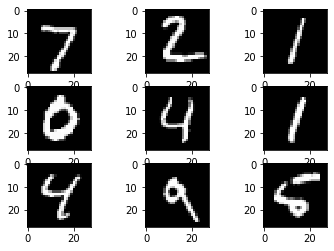

In [24]:
from matplotlib import pyplot
# summarize loaded dataset
#print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_test[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# RandomForest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

In [26]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train.reshape(60000,-1),y_train)
model.score(x_test.reshape(10000,-1),y_test)
y_predict =  model.predict(x_test.reshape(10000,-1))
display(y_predict[:20],y_test[:20])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

### Accuracy Score - Random Forest Classifier

In [27]:
accuracy_score(y_test,y_predict)

0.9705

In [28]:
cross= cross_val_predict(model,x_train.reshape(60000,-1),y_train,cv=3,method='predict_proba')

In [29]:
display(y_predict[:20],y_test[:20])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

# ROC & AUC

In [30]:
def predict_threshold(model,x_test,thresholds):
    import numpy as np
    return np.where(model.predict(x_test.reshape(10000,-1))>thresholds,1,0)

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.1,0.1):
        y_predict = predict_threshold(model,x_test,thr)
        print("Threshold:",thr)
        print(pd.crosstab(y_test,y_predict))

Threshold: 0.0
col_0    0     1
row_0           
0      971     9
1        0  1135
2        6  1026
3        1  1009
4        1   981
5        5   887
6        7   951
7        1  1027
8        4   970
9        7  1002
Threshold: 0.1
col_0    0     1
row_0           
0      971     9
1        0  1135
2        6  1026
3        1  1009
4        1   981
5        5   887
6        7   951
7        1  1027
8        4   970
9        7  1002
Threshold: 0.2
col_0    0     1
row_0           
0      971     9
1        0  1135
2        6  1026
3        1  1009
4        1   981
5        5   887
6        7   951
7        1  1027
8        4   970
9        7  1002
Threshold: 0.30000000000000004
col_0    0     1
row_0           
0      971     9
1        0  1135
2        6  1026
3        1  1009
4        1   981
5        5   887
6        7   951
7        1  1027
8        4   970
9        7  1002
Threshold: 0.4
col_0    0     1
row_0           
0      971     9
1        0  1135
2        6  1026
3       

#### at different thresholds, 9 incorrect classfication has happened for image containing digit 1